# Brighthouse Consultancy

## Predicting Income Class

### Objectives

The task involves producing an accurate income class which is necessary for various domains, including social welfare programs, resource allocation, financial decision-making, and targeted marketing strategies. By accurately identifying individuals with incomes below or above $50,000, policymakers can allocate resources effectively, financial institutions can assess creditworthiness, and businesses can tailor their marketing efforts to specific income segments.


### Methodology

1. Business Understanding - The objective of the exercise is to predict income of a citizen (below or above $50k) depending on factors presented.
2. Data Understanding - The data provided is in a csv file containing 32561 records from a census. There are unknown values in columns such as occupation and workclass. Exploratory analysis will be carried out in the notebook.
3. Data Preparation - Unknown records were handled by labelling as 'unknown' and assigned a numerical value.
4. Modelling - 8 models will be evaluated for this classification task. Training and test data will be split 70:30.
5. Evaluation - Each of the 8 models will be compared and evaluated
6. Deployment - This was not within the scope of this exercise

In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load dataset

income_data = pd.read_csv(r"C:\Users\inoke\OneDrive\デスクトップ\10Alytics\Machine Learning\Income Prediction\income_evaluation.csv")
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Inspection

In [3]:
# Get the shape of our dataset

income_data.shape

(32561, 15)

In [4]:
# Information about the columns

income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
income_data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
# Check for duplicates

income_data.duplicated().sum()

24

In [7]:
# There are 24 duplicates

# Let us proceed to drop the duplicated rows

income_data.drop_duplicates(inplace=True)
income_data.shape

(32537, 15)

In [8]:
# notice some whitespaces in the column names

income_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [9]:
# Remove the whitespaces in column names

income_data.columns = income_data.columns.str.lstrip()
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
# Let's drop the fnlwgt  column

income_data.drop(['fnlwgt'], axis=1, inplace=True)
income_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Print unique values in each column

for i in income_data.columns.tolist():
    print(i, '\n\n', income_data[i].unique())
    print('\n ------------------------------------------------------------------------------------------------------')

age 

 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 ------------------------------------------------------------------------------------------------------
workclass 

 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 ------------------------------------------------------------------------------------------------------
education 

 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 ------------------------------------------------------------------------------------------------------
education-num 

 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 ---------------------------------------------

In [12]:
# We noticed ' ?' in workclass, occupation and native-country

# Let us replace the ' ?' with 'nan'

In [13]:
income_data[income_data == ' ?'] = np.nan
income_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   education       32537 non-null  object
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      30694 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hours-per-week  32537 non-null  int64 
 12  native-country  31955 non-null  object
 13  income          32537 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [14]:
# Replace missing values with 'Unknown'

for col in ['workclass', 'occupation', 'native-country']:
    income_data[col].fillna('Unknown', inplace=True)
    


In [15]:
# Confirm the replacements

income_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hours-per-week  32537 non-null  int64 
 12  native-country  32537 non-null  object
 13  income          32537 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [16]:
income_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
workclass,32537,9,Private,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32537.0,NaN,NaN,NaN,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
marital-status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32537,15,Prof-specialty,4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,32537.0,NaN,NaN,NaN,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0


### EDA

#### Income

In [17]:
income_data['income'].value_counts()

 <=50K    24698
 >50K      7839
Name: income, dtype: int64

Text(0.5, 1.0, 'Income Distribution')

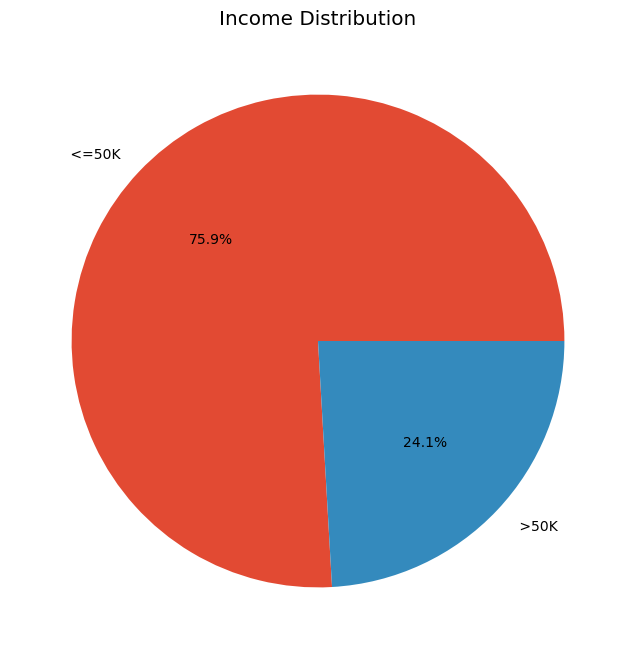

In [18]:

income_counts = income_data['income'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')


There are more persons earning below 50k US Dollars

Text(0, 0.5, 'Count')

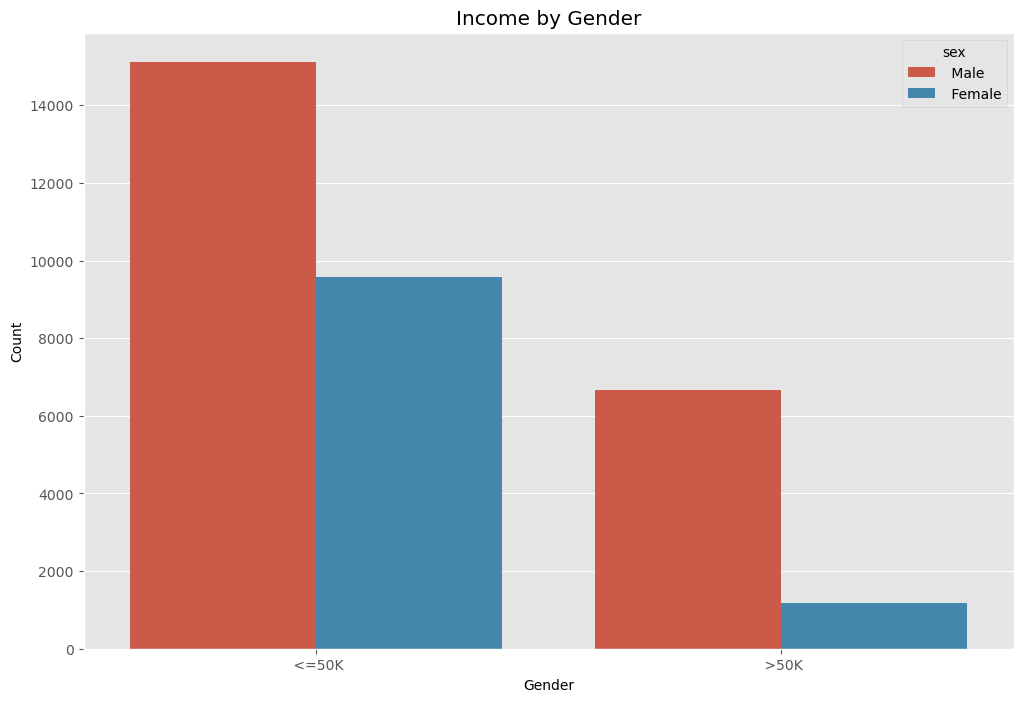

In [19]:
# Income by Gender

plt.figure(figsize=(12,8))
plt.title('Income by Gender')
sns.countplot(x='income', data=income_data, hue='sex')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

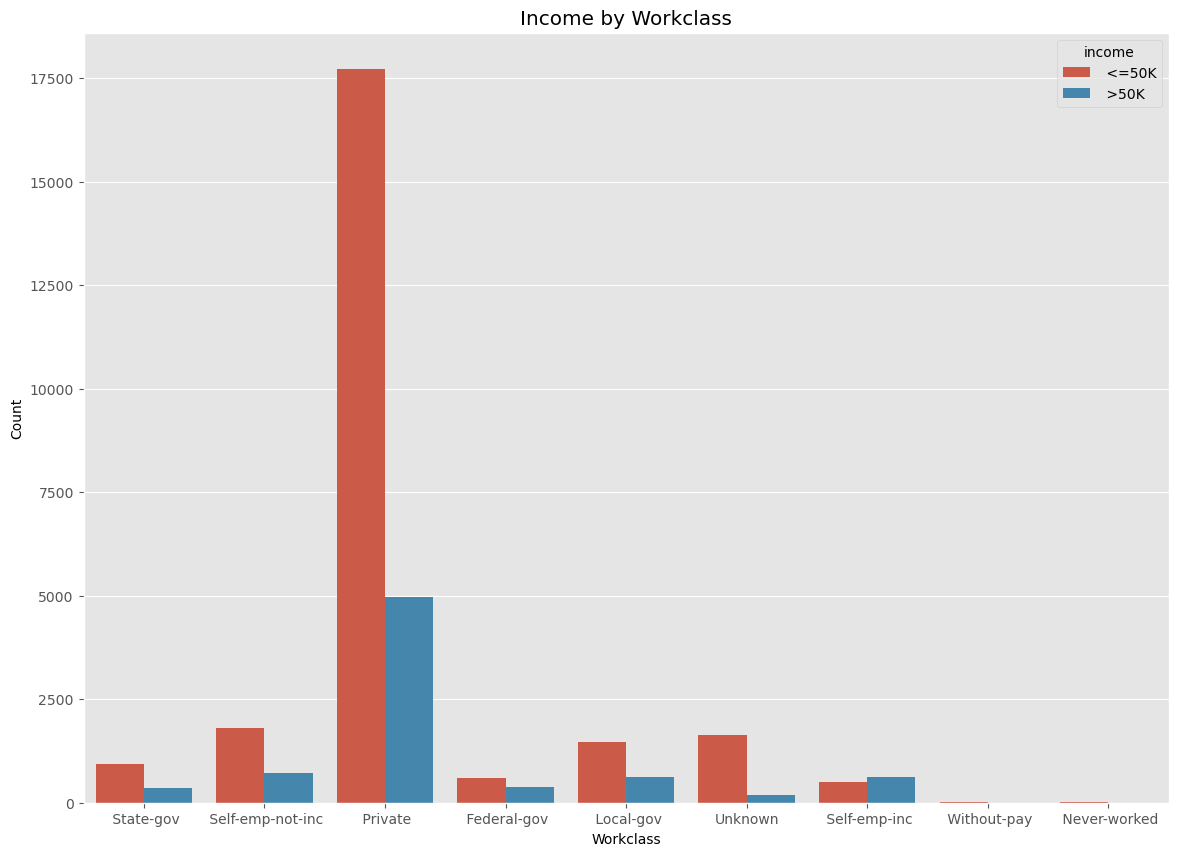

In [21]:
plt.figure(figsize=(14,10))
plt.title('Income by Workclass')
sns.countplot(x='workclass', data=income_data, hue='income')
plt.xlabel('Workclass')
plt.ylabel('Count')

In [22]:
# What do you observe?

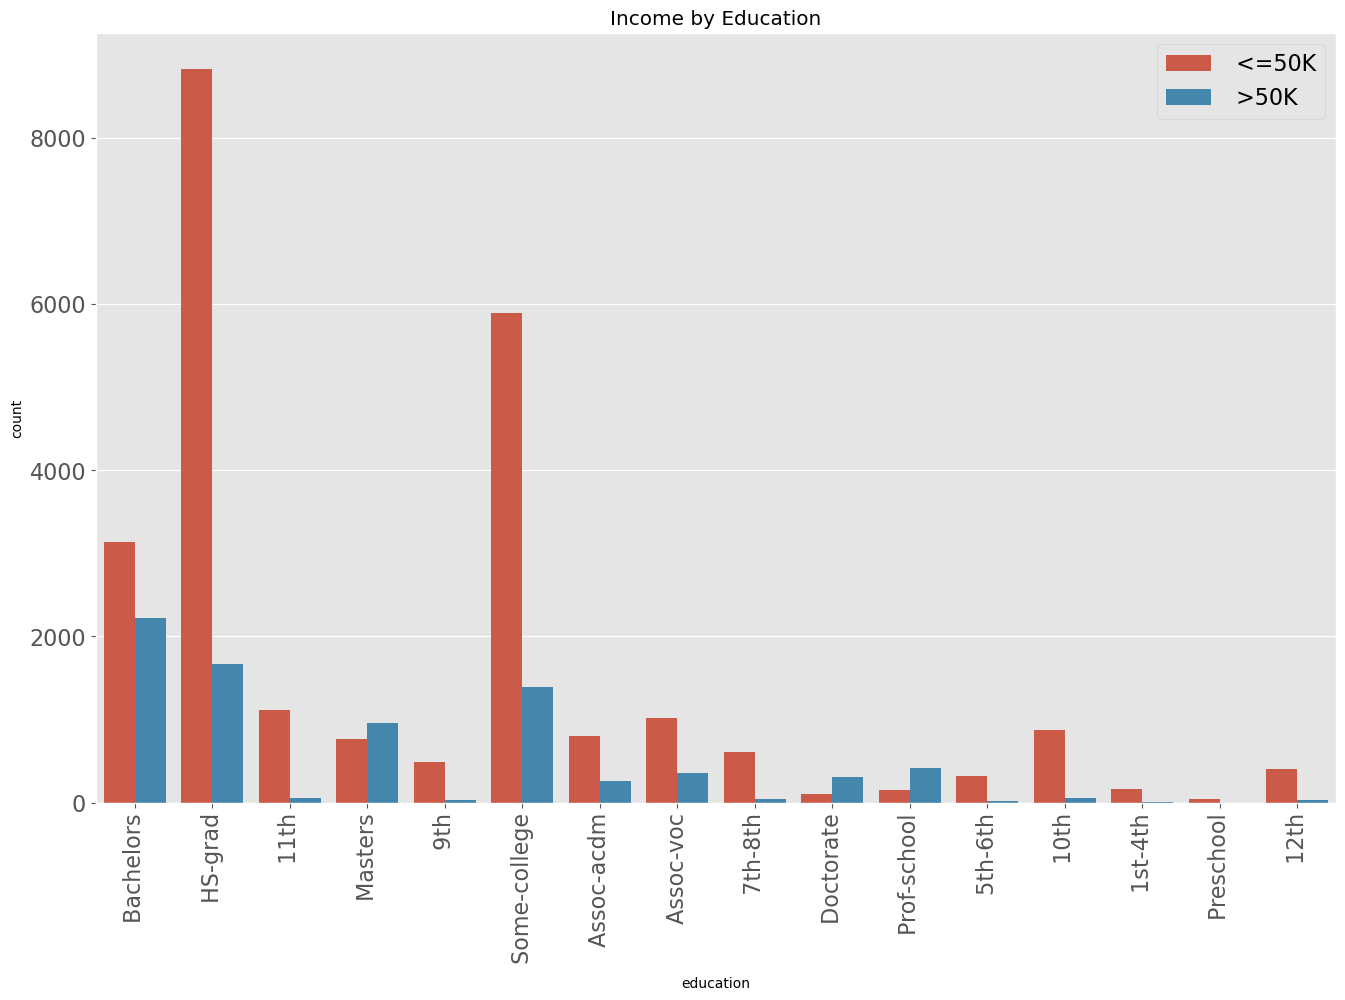

In [23]:
plt.figure(figsize=(16,10))
plt.title('Income by Education')
sns.countplot(x='education', data=income_data, hue='income')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


In [24]:
# What do you observe?

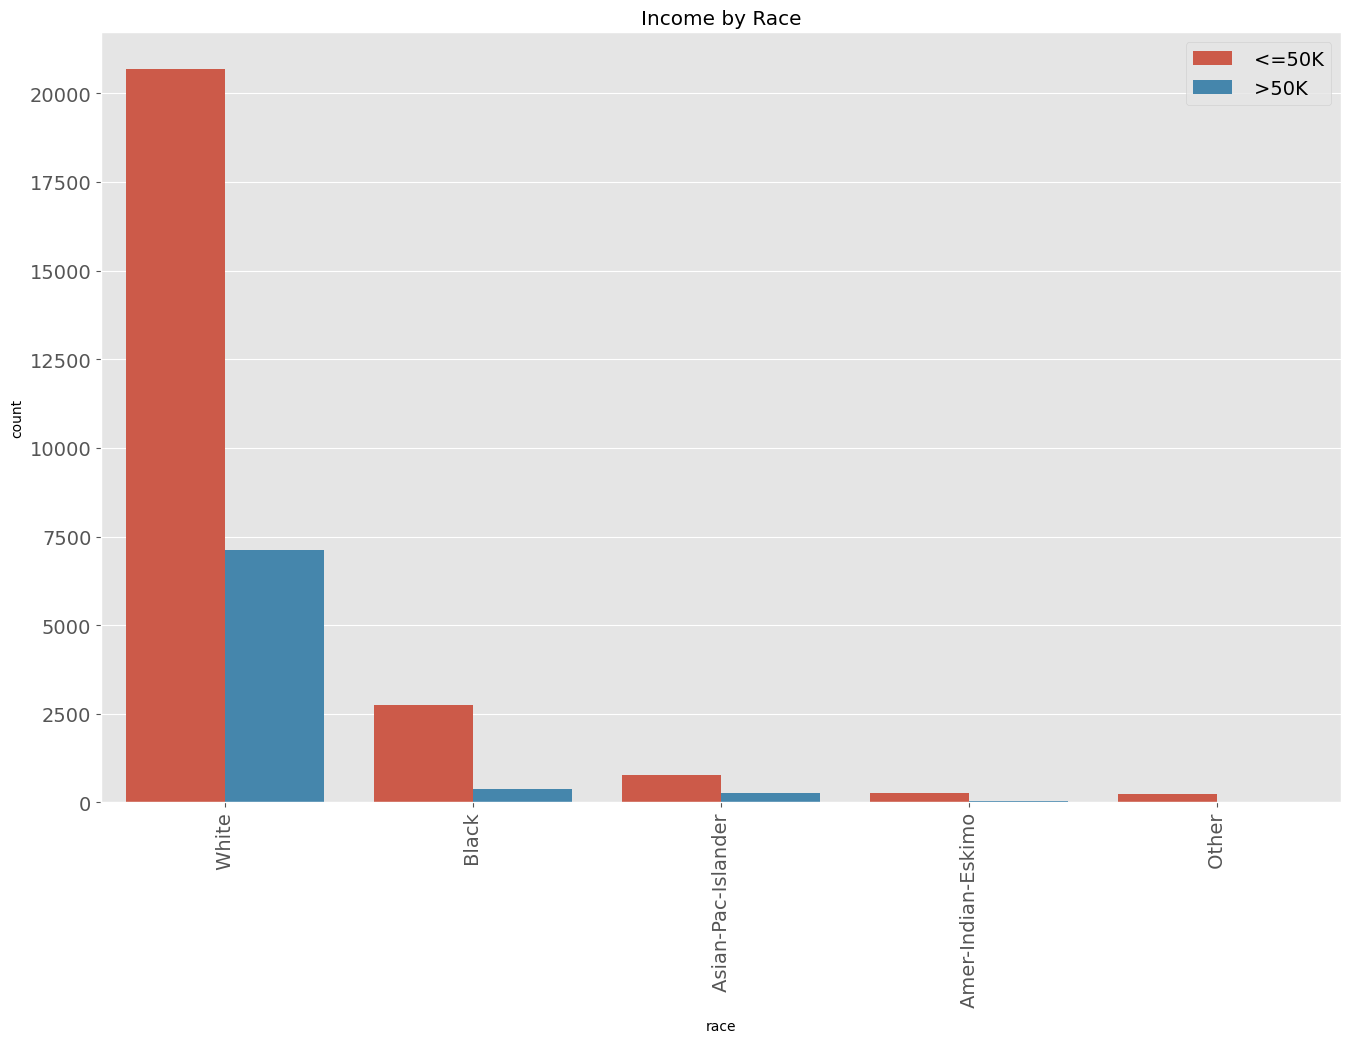

In [25]:
plt.figure(figsize=(16,10))
plt.title('Income by Race')
sns.countplot(x='race', data=income_data, hue='income')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [26]:
# What do you observe?

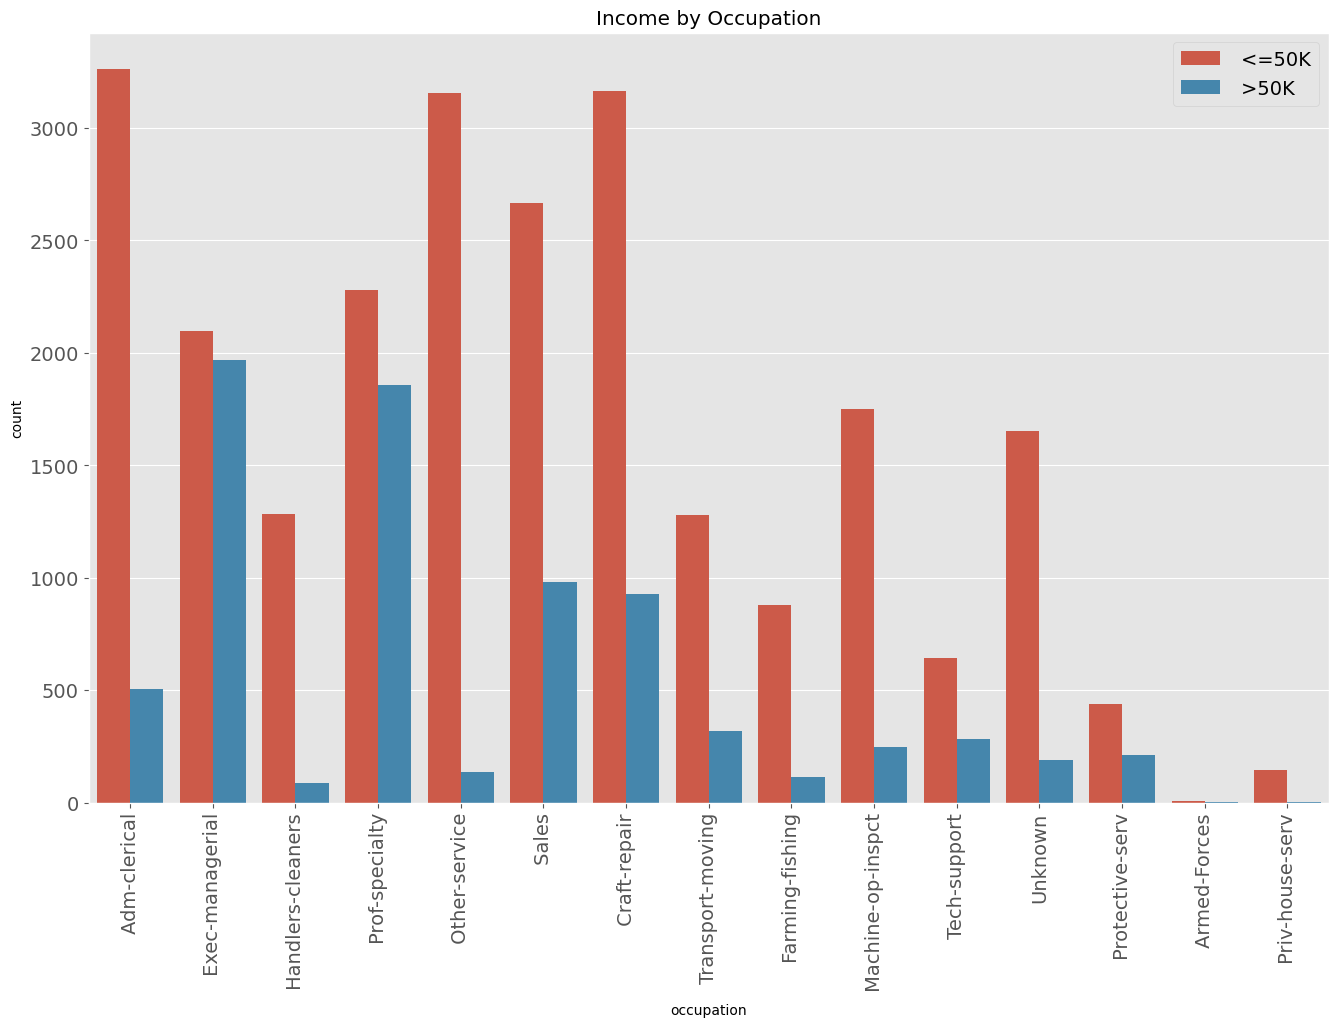

In [27]:
plt.figure(figsize=(16,10))
plt.title('Income by Occupation')
sns.countplot(x='occupation', data=income_data, hue='income')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [28]:
income_data['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
# What do you observe?

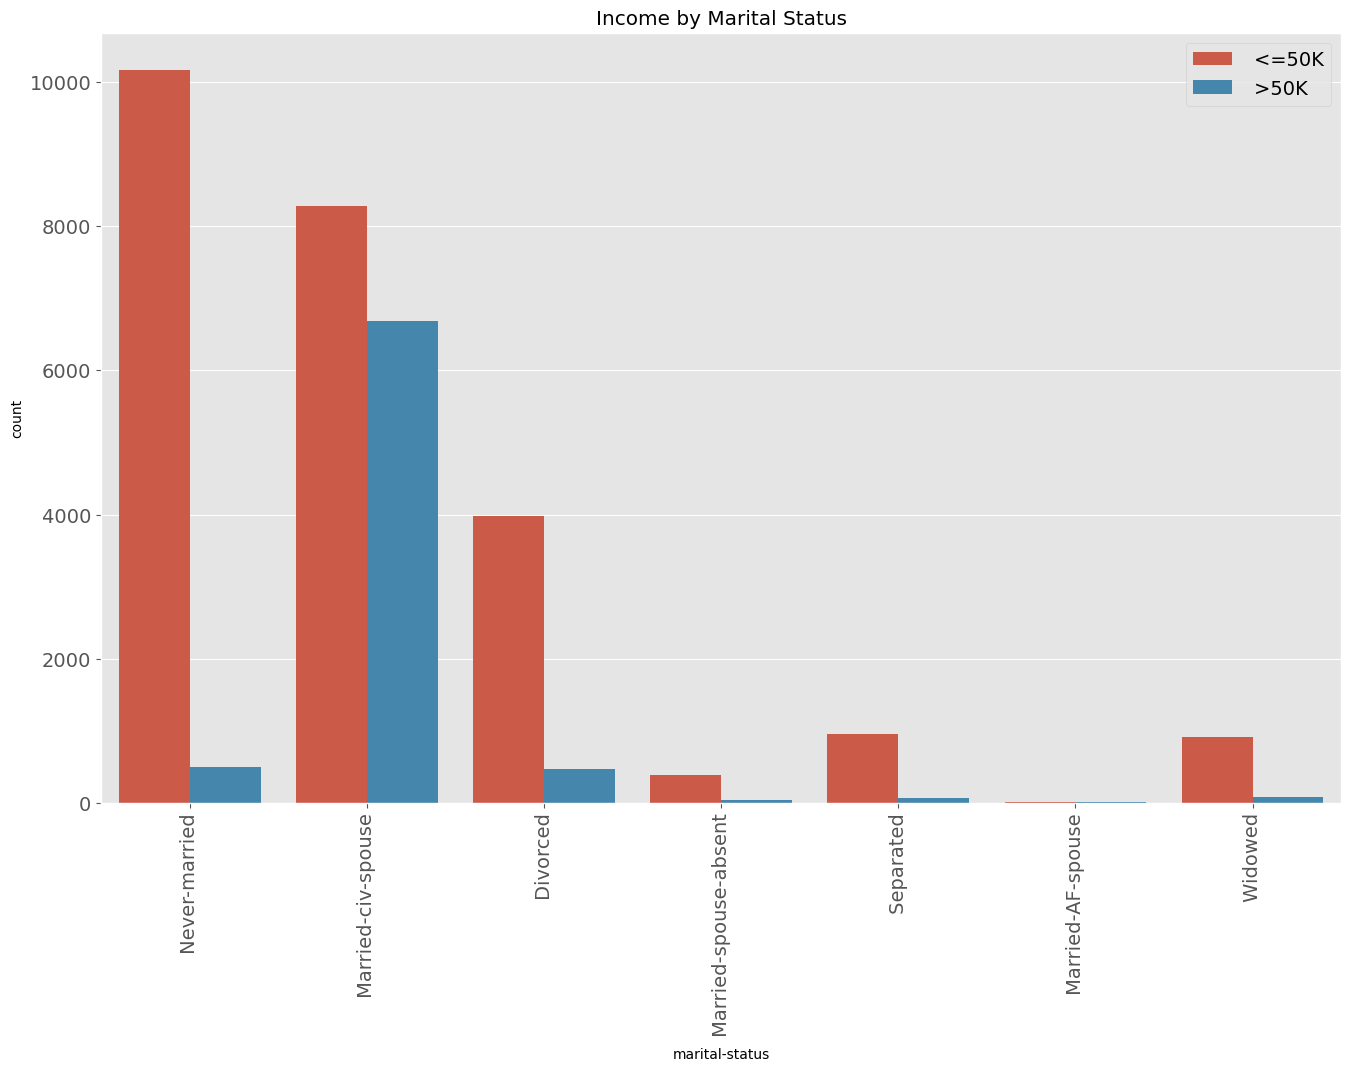

In [30]:
plt.figure(figsize=(16,10))
plt.title('Income by Marital Status')
sns.countplot(x='marital-status', data=income_data, hue='income')
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [31]:
# What do you observe?

Text(0.5, 1.0, 'Age distribution by Income')

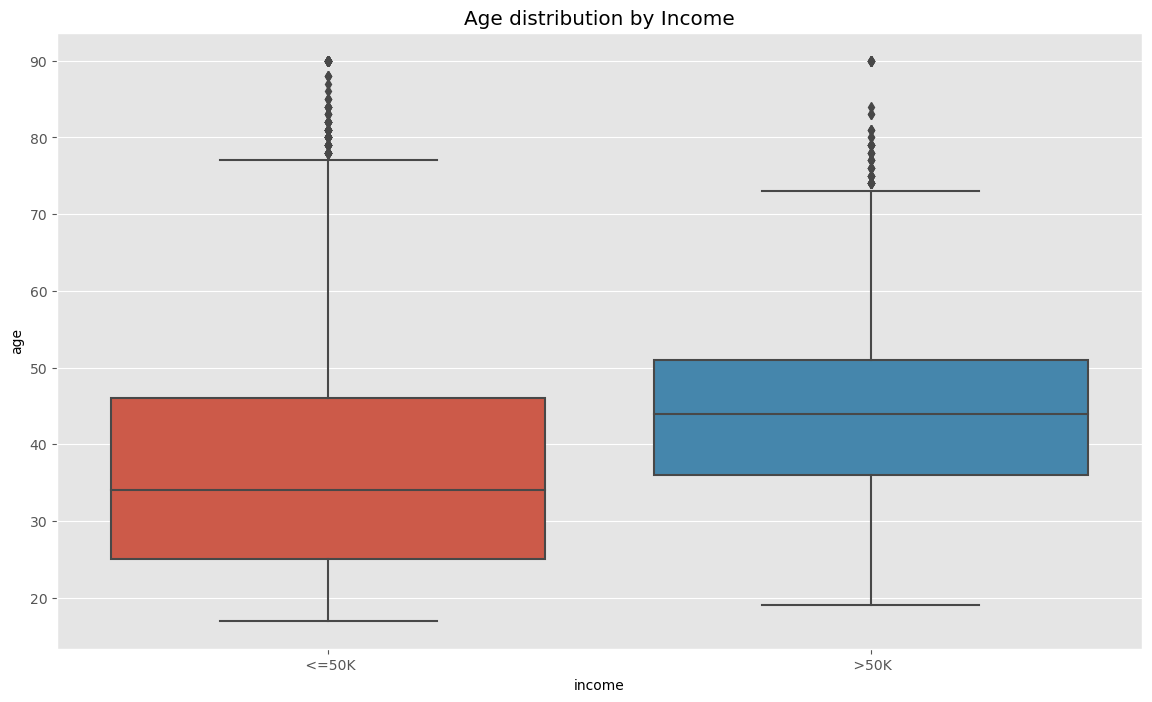

In [32]:

plt.figure(figsize=(14,8))

sns.boxplot(x='income', y='age', data=income_data)
plt.title('Age distribution by Income')


In [33]:
# What do you observe?

### Data Pre-processing

In [34]:
# Let us transform income column into numerical attributes
# We will assign income <= 50k 0 and income > 50k 1


income_data['income'] = income_data['income'].map({' <=50K': 0, ' >50K': 1})
income_data['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int64

In [35]:
# Drop education column as it is similar to education-num column

income_data.drop(['education'], axis=1, inplace=True)
income_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [36]:
type(income_data)

pandas.core.frame.DataFrame

In [37]:
categorical = []
numerical = []

for i in income_data.columns:
    if income_data[i].dtype=='O': 
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical, numerical, sep='\n\n\n')

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


### Split the data

In [38]:
# Splitting the independent from the dependent columns

X = income_data.drop(['income'], axis=1)
y = income_data['income']



### Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(22775, 12)
(9762, 12)
(22775,)
(9762,)


### Encode the categorical variables

In [40]:
# Next, let us encode our categorical variables using one hot encoding

# Apply pd.get_dummies on training and test data

X_train = pd.get_dummies(X_train, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X_test = pd.get_dummies(X_test, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Align the columns of the encoded test set with the columns of the encoded training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [41]:
display(X_train.head())
display(X_test.head())


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
13011,36,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
24494,30,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16923,41,11,7298,0,60,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25335,46,14,0,1977,60,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
12363,37,11,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
24188,50,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26471,25,9,0,0,45,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26843,47,9,0,1977,45,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8795,61,4,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27178,34,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Scaling

In [42]:
# Robust Scaler is preferred here as it is more robust to outliers

from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [43]:
display(X_train.head())
display(X_test.head())

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
13011,-0.05,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24494,-0.35,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16923,0.20,0.333333,7298.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
25335,0.45,1.333333,0.0,1977.0,4.0,0.0,0.0,0.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12363,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
24188,0.65,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26471,-0.60,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26843,0.50,-0.333333,0.0,1977.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8795,1.20,-2.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27178,-0.15,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
print(X_train.shape)
print(X_test.shape)

(22775, 91)
(9762, 91)


### Model Selection

In [45]:
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7345
           1       0.63      0.63      0.63      2417

    accuracy                           0.82      9762
   macro avg       0.75      0.75      0.75      9762
weighted avg       0.82      0.82      0.82      9762



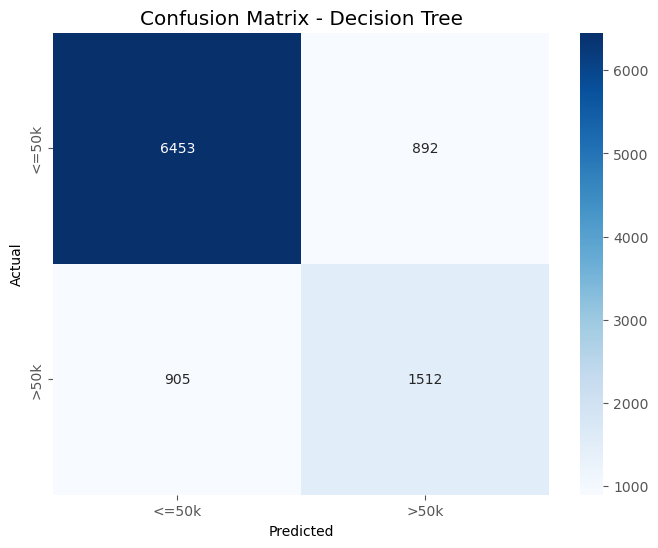





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7345
           1       0.73      0.67      0.70      2417

    accuracy                           0.86      9762
   macro avg       0.81      0.79      0.80      9762
weighted avg       0.85      0.86      0.85      9762



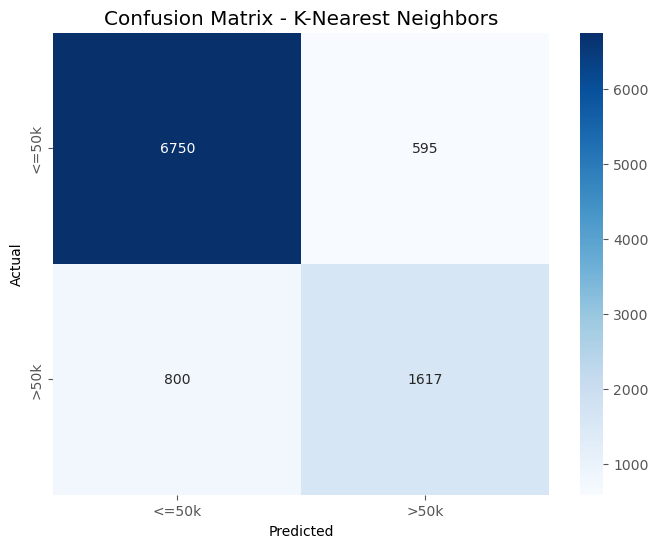





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7345
           1       0.75      0.29      0.42      2417

    accuracy                           0.80      9762
   macro avg       0.78      0.63      0.65      9762
weighted avg       0.79      0.80      0.76      9762



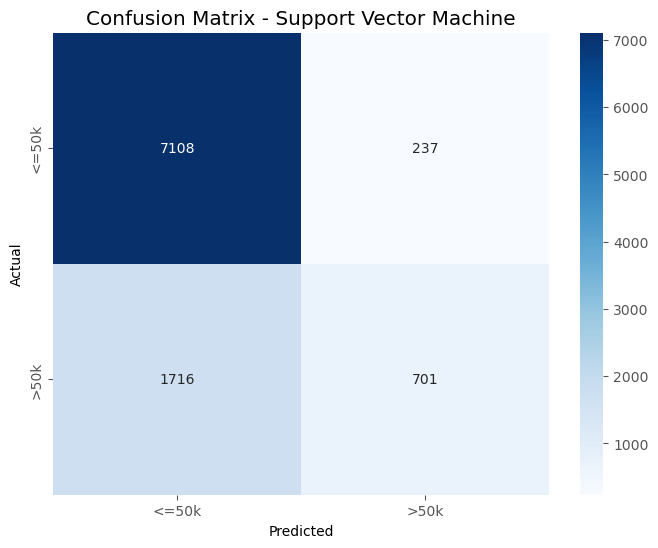





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7345
           1       0.75      0.59      0.66      2417

    accuracy                           0.85      9762
   macro avg       0.81      0.76      0.78      9762
weighted avg       0.84      0.85      0.84      9762



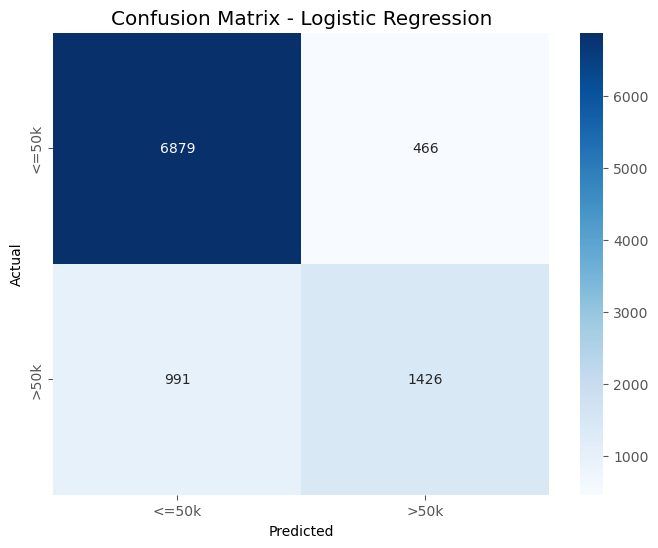





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7345
           1       0.73      0.64      0.68      2417

    accuracy                           0.85      9762
   macro avg       0.81      0.78      0.79      9762
weighted avg       0.85      0.85      0.85      9762



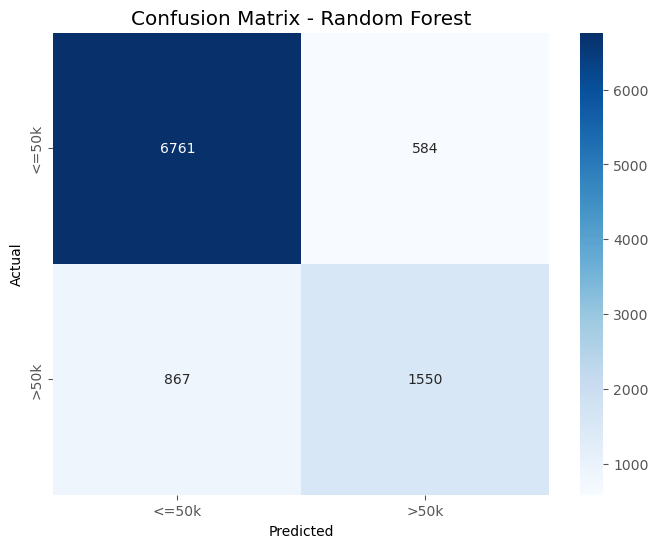





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      7345
           1       0.54      0.82      0.65      2417

    accuracy                           0.78      9762
   macro avg       0.73      0.80      0.75      9762
weighted avg       0.83      0.78      0.80      9762



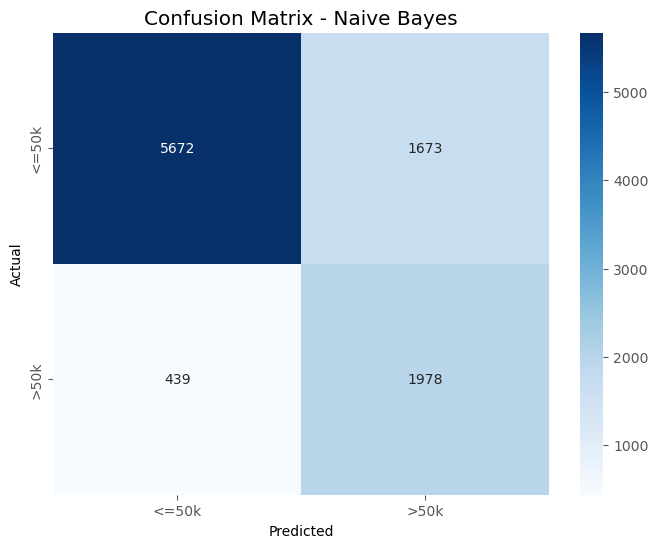





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7345
           1       0.80      0.62      0.70      2417

    accuracy                           0.87      9762
   macro avg       0.84      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762



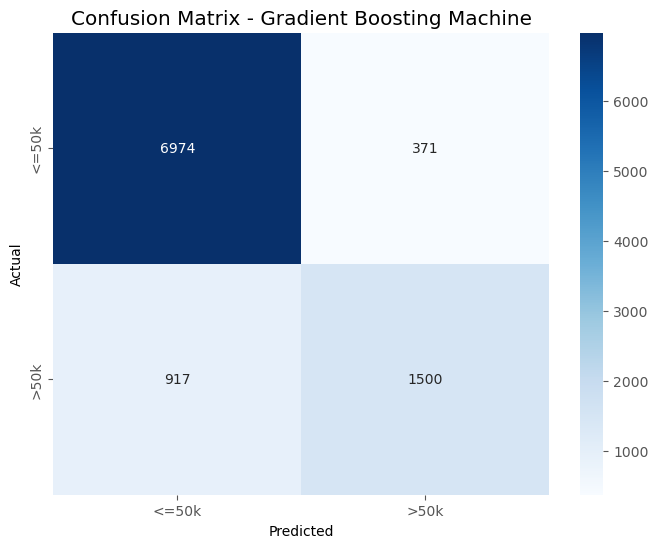





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7345
           1       0.79      0.68      0.73      2417

    accuracy                           0.87      9762
   macro avg       0.84      0.81      0.82      9762
weighted avg       0.87      0.87      0.87      9762



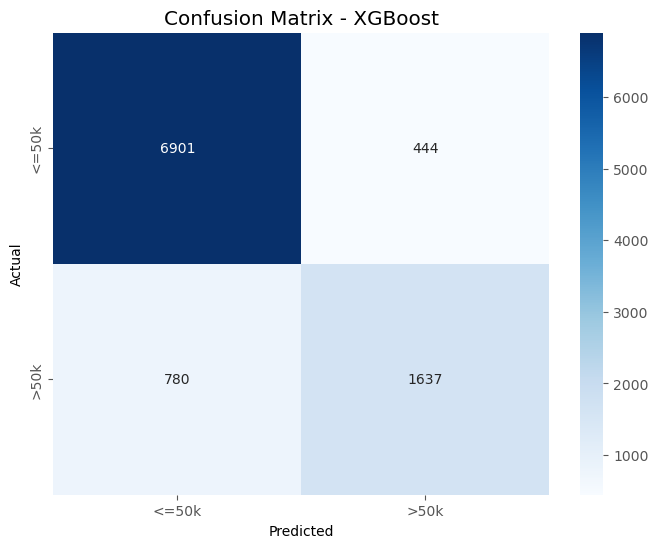

In [46]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['<=50k','>50k'], yticklabels=['<=50k','>50k'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [47]:

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)
    



,Model,Accuracy,Precision,Recall,F1-Score
7,XGBoost,0.874616,0.870767,0.874616,0.871335
0,Gradient Boosting Machine,0.868060,0.863469,0.868060,0.862024
1,K-Nearest Neighbors,0.857099,0.853675,0.857099,0.854918
2,Random Forest,0.851362,0.846724,0.851362,0.848146
3,Logistic Regression,0.850748,0.844274,0.850748,0.844231
4,Decision Tree,0.815919,0.815589,0.815919,0.815752
5,Naive Bayes,0.783651,0.832494,0.783651,0.795729
6,Support Vector Machine,0.799939,0.791122,0.799939,0.764991


In [48]:


importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                               Feature  Importance
16  marital-status_ Married-civ-spouse    0.490016
2                         capital-gain    0.048139
39             relationship_ Own-child    0.040554
1                        education-num    0.035776
28           occupation_ Other-service    0.023070
..                                 ...         ...
64            native-country_ Honduras    0.000000
63  native-country_ Holand-Netherlands    0.000000
62               native-country_ Haiti    0.000000
58              native-country_ France    0.000000
65                native-country_ Hong    0.000000

[91 rows x 2 columns]
